In [24]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

nu = 0.02, uc = 2.500000e-02
slip = 4.480000e-04


Text(0, 0.5, 'y/h')

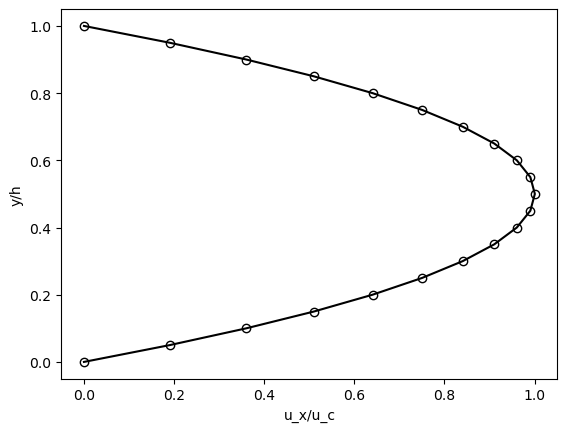

In [34]:
gx = 0.00001
tau = 0.56
ny = 21
nu = (tau - 0.5) / 3.0
h = float((ny - 1))
uc = gx*h**2/(8.0*nu)
y = np.linspace(0, h, ny)/h
print(f"nu = {nu:.2f}, uc = {uc:.6e}")

ux = np.loadtxt("ux.txt")
ux = ux[:, 11]
x = ux/uc
slip = ux[0]/uc
print(f"slip = {slip:.6e}")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, "-o", color="k", fillstyle="none")
ax.set_xlabel("u_x/u_c")
ax.set_ylabel("y/h")